<a href="https://colab.research.google.com/github/JoaqSM/ML_course-colab-files/blob/main/Proyecto_Final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.- Obtención de Datos

Importar ml-final-project-data.xlsx a dataframes de pandas

In [107]:
# prompt: open ml-final-project-data.xlsx into pandas dataframes
import pandas as pd

df = pd.read_excel('ml-final-project-data.xlsx', sheet_name='A')


In [108]:
# prompt: print headers of dataframes

df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480
0,0.0,945.881189,949.455569,948.320961,947.627981,949.004393,949.162855,947.636857,947.405937,948.388411,...,3.718121,3.952703,4.108844,3.931507,3.979310,3.902778,3.790210,4.253521,3.900709,4.185714
1,-5.4,944.007685,947.313612,946.309784,945.522816,947.208432,947.308945,945.525300,945.264026,946.103164,...,3.624161,3.898649,4.081633,3.863014,3.965517,3.861111,3.748252,4.183099,3.815603,4.114286
2,-5.3,943.909065,947.140483,946.488818,945.528897,947.093910,946.761374,945.355980,945.103218,946.127936,...,3.704698,3.925676,4.108844,3.883562,3.979310,3.861111,3.741259,4.232394,3.879433,4.128571
3,-4.7,943.010422,946.282655,945.351124,944.149768,946.203153,945.855203,944.161602,944.331529,944.721618,...,3.704698,3.885135,4.054422,3.849315,3.965517,3.861111,3.734266,4.197183,3.801418,4.114286
4,-4.7,942.374836,946.244955,945.080812,944.303151,945.935353,945.831117,944.545984,944.044796,944.582048,...,3.651007,3.885135,4.068027,3.863014,3.855172,3.833333,3.762238,4.169014,3.829787,4.171429


In [109]:
df.shape

(42, 481)

# 2.- Procesamiento de Datos

## Datos faltantes

Se revisa el número de valores faltantes por columnas

In [110]:
# Checking for missing values, sum of missing values per column

df.isnull().sum()


Y       0
X1      0
X2      0
X3      0
X4      0
       ..
X476    0
X477    0
X478    0
X479    0
X480    0
Length: 481, dtype: int64

Se revisa el número de valores faltantes en general

In [111]:
# Checking for missing values, sum of all missing values}

df.isnull().sum().sum()

0

Se determina que el dataset no posee valores faltantes

## Division X e y

In [112]:
df_y = pd.DataFrame(df['Y'])
df_X = df.drop(columns=['Y'])

## Normalización Preliminar

In [113]:
def min_max_normalization(df):
  normalized_df = (df-df.min())/(df.max()-df.min())
  return normalized_df

normalized_df = min_max_normalization(df_X)

In [114]:
normalized_df.shape

(42, 480)

## Datos atípicos

Se detectan datos atípicos en cada variable de forma independiente de acuerdo al Z-score con cuantas desviasiones estándar se necesiten para eliminar a lo más un 5% de la información.

In [115]:
from scipy import stats

def detect_outliers_df(df, threshold=3):
    # Ensure the input is a DataFrame
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a Pandas DataFrame")

    # Apply Z-score to each column
    z_scores = np.abs(stats.zscore(df))

    # Create a DataFrame with the same shape as the input, where True indicates an outlier
    outliers_df = pd.DataFrame(z_scores > threshold, columns=df.columns, index=df.index)

    return outliers_df

def remove_outliers(df, threshold=3):
    # Detect outliers using the Z-score
    outliers_df = detect_outliers_df(df, threshold)

    # Use boolean indexing to filter out rows with outliers
    df_no_outliers = df[~outliers_df.any(axis=1)]

    return df_no_outliers

Se eliminan todas las filas que posean al menos un dato atípico.

In [116]:
no_outliers = remove_outliers(normalized_df, 5)

Porcentaje de filas conservadas con cinco desviaciones estándares

In [117]:
len(no_outliers)/len(normalized_df)

0.9523809523809523

Con cinco desviaciones estándares se pierde un 4.77% del número de filas.

## Normalización post-procesamiento

In [119]:
df_X = min_max_normalization(normalized_df)
df_X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480
0,0.668725,0.695764,0.670450,0.674428,0.693568,0.667318,0.657697,0.642340,0.685834,0.696850,...,0.666667,0.750000,0.72,0.727273,0.750000,0.705882,0.695652,0.727273,0.714286,0.72
1,0.388350,0.394300,0.392937,0.343019,0.426153,0.403011,0.363292,0.325556,0.360339,0.396583,...,0.000000,0.464286,0.56,0.272727,0.666667,0.352941,0.434783,0.424242,0.142857,0.32
2,0.373591,0.369933,0.417641,0.343976,0.409101,0.324945,0.339684,0.301773,0.363867,0.375773,...,0.571429,0.607143,0.72,0.409091,0.750000,0.352941,0.391304,0.636364,0.571429,0.40
3,0.239107,0.249200,0.260656,0.126865,0.276469,0.195755,0.173157,0.187642,0.163560,0.223207,...,0.571429,0.392857,0.40,0.181818,0.666667,0.352941,0.347826,0.484848,0.047619,0.32
4,0.143989,0.243894,0.223357,0.151011,0.236594,0.192321,0.226750,0.145235,0.143681,0.263792,...,0.190476,0.392857,0.48,0.272727,0.000000,0.117647,0.521739,0.363636,0.238095,0.64


# 3.- Exploración

Debido a la alta dimensionalidad del conjutno de datos, se utiliza análisis de componentes principales

In [120]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(df_X)

PCA(n_components=4)

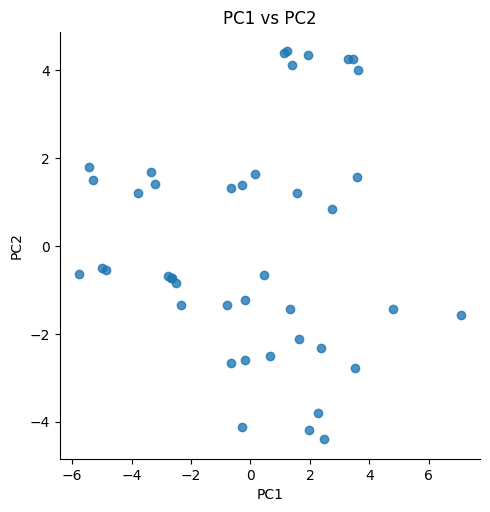

In [121]:
# plot a projection of the first two principal components
pca_df = pd.DataFrame(pca.transform(df_X), columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df = pca_df.join(df_y)
sns.lmplot(x='PC1', y='PC2', data=pca_df, fit_reg=False)
plt.title('PC1 vs PC2')
plt.show()

# Reducción de la dimensionalidad

Se realiza Análisis de Componentes Principales (PCA) conservando componentes tal que se describa al menos el 85% de la varianza.



In [122]:
pca = PCA(n_components = 0.85)
df_pca = pca.fit_transform(df_X)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6
0,1.338682,-1.434092,-0.018155,0.125231,0.036553,0.008913,-0.043389
1,-4.983089,-0.509928,1.811632,-0.694671,-0.480588,0.915455,-0.684707
2,-3.775373,1.200490,-1.517871,0.814068,-1.375351,0.511421,0.478122
3,-5.312302,1.500384,1.266221,0.453318,0.632313,-0.249129,0.863700
4,-5.442346,1.788649,1.259570,0.592518,2.014130,-0.523562,-0.684418


Se observa que con 7 componentes principales se describe el 85% de la varianza

# Modelado

## Regresión Lineal

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

LR = LinearRegression()
scores_LR = cross_validate(LR, df_X, df_y, cv=10,
                           scoring=('r2', 'neg_mean_squared_error'))

In [148]:
#print(scores_LR)
print("Promedio de R2: " + str(np.mean(scores_LR['test_r2'])))
print("Promedio de errores cuadráticos promedios negativos : " +
      str(np.mean(scores_LR['test_neg_mean_squared_error'])))

Promedio de R2: -196.28851684154182
Promedio de errores cuadráticos promedios negativos : -5.989700561210622


## Descenso de Gradiente Estocástico

In [146]:
from sklearn.linear_model import SGDRegressor

SDG = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
scores_SDG = cross_validate(SDG, df_X, df_y, cv=10,
                           scoring=('r2', 'neg_mean_squared_error'))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [147]:
#print(scores_SDG)
print("Promedio de R2: " + str(np.mean(scores_SDG['test_r2'])))
print("Promedio de errores cuadráticos promedios negativos : " +
      str(np.mean(scores_SDG['test_neg_mean_squared_error'])))

Promedio de R2: -57.125900881163076
Promedio de errores cuadráticos promedios negativos : -2.4573584333382668


# Resultados

Resultados regresión lineal

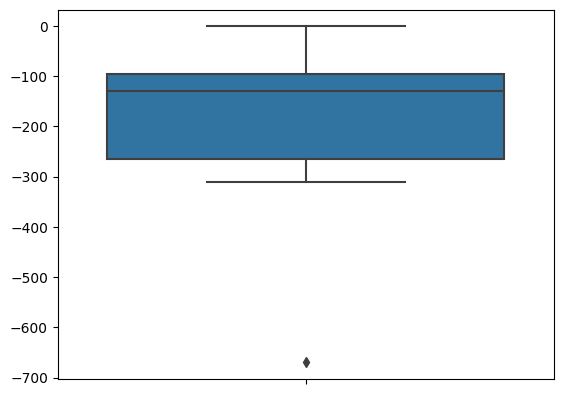

In [150]:
# Create a boxplot using Seaborn
sns.boxplot(y=scores_LR['test_r2'])

# Show the plot
plt.show()

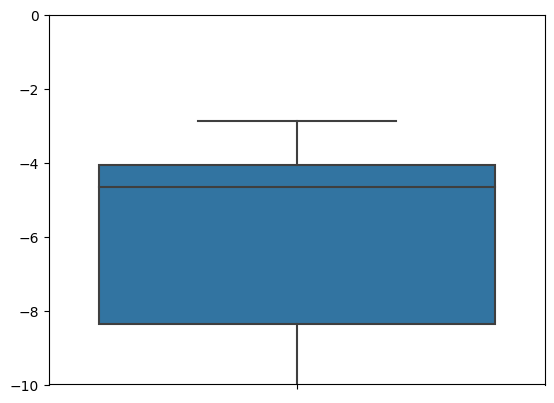

In [158]:
# Create a boxplot using Seaborn
sns.boxplot(y=scores_LR['test_neg_mean_squared_error'])
# Set the y-axis range (limits)
plt.ylim(-10, 0)  # Adjust the range as needed
# Show the plot
plt.show()

Resultados descenso de Gradiente Estocástico

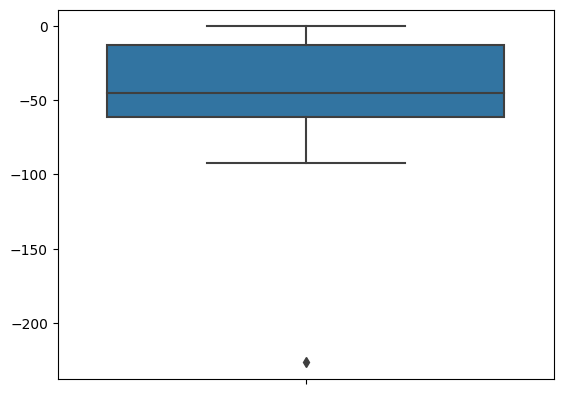

In [155]:
# Create a boxplot using Seaborn
sns.boxplot(y=scores_SDG['test_r2'])

# Show the plot
plt.show()

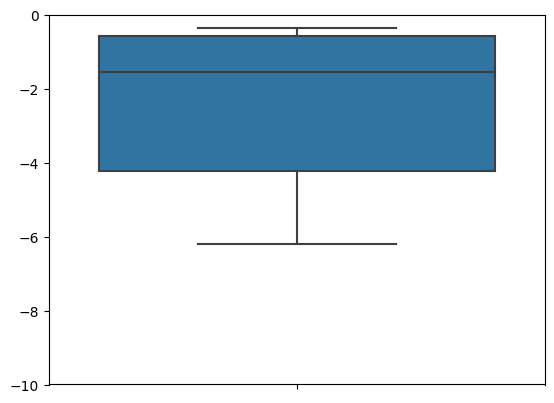

In [157]:
# Create a boxplot using Seaborn
sns.boxplot(y=scores_SDG['test_neg_mean_squared_error'])
# Set the y-axis range (limits)
plt.ylim(-10, 0)  # Adjust the range as needed
# Show the plot
plt.show()